![](https://i.imgur.com/0AUxkXt.png)

# Lab 2 - Pandas & Seaborn

## Import libraries

In [2]:
# Your code here
# Hint: copy from the lecture notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import data

In this Lab we will use a dataset from seaborn library. The dataset contains tips data from different customers females and males, smokers and non smokers, from days, dinner or lunch and from different table size.

In [5]:
# Run this code
tips = sns.load_dataset('tips')

### Overview

**Show the first 3 rows of the data**

In [6]:
# Your code here
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


### Show the last 2 rows of the data

In [8]:
# Your code here
tips.tail(2)

,total_bill,tip,sex,smoker,day,time,size
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### Show 4 randoms rows

In [10]:
# Your code here
tips.sample(4)

,total_bill,tip,sex,smoker,day,time,size
232,11.61,3.39,Male,No,Sat,Dinner,2
221,13.42,3.48,Female,Yes,Fri,Lunch,2
222,8.58,1.92,Male,Yes,Fri,Lunch,1
180,34.65,3.68,Male,Yes,Sun,Dinner,4


### Print a concise summary of the data

Print information about the data including the index dtype and column dtypes, non-null values and memory usage.

In [12]:
# Your code here
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


### Generate descriptive statistics

A descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

In [138]:
# Your code here
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


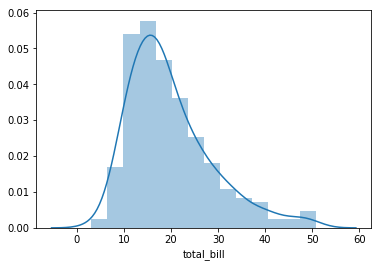

In [142]:
sns.distplot(tips['total_bill'])

## EDA - Exploratory Data Analysis

**What is the min/max of tip?**

In [140]:
# Your code here
print('max: ', tips['tip'].max())
print('min: ' , tips.tip.min())

max:  10.0
min:  1.0


**The restaurant is open on which days of the week?**

*Hint: unique values of the column `day`*

In [62]:
# Your code here
print("The restaurant is open " , tips['day'].unique())

The restaurant is open  [Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]


**List of unique values in column `time`**

In [63]:
# Your code here
tips['time'].unique()

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

**What is the range of table size?**

In [144]:
# Your code here
tips['size'].min() , tips['size'].max()

(1, 6)

**How many man/woman paid for the dish?**


In [74]:
# Your code here
print(tips['sex'].unique())
print('Man:' , tips[tips['sex'] == 'Male' ].size)
print('Female:' , tips[tips['sex'] == 'Female' ].size)

[Female, Male]
Categories (2, object): [Female, Male]
Man: 1099
Female: 609


In [148]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

**What is the percentage of smoker table and their revenue?**

In [158]:
# Your code here
print('The percentage of smoker:' , tips[tips['smoker'] == 'Yes' ].size / tips.size)
tips_smoker = tips.groupby('smoker').sum()
tips_smoker

The percentage of smoker: 0.38114754098360654


,total_bill,tip,size
smoker,,,
Yes,1930.34,279.81,224
No,2897.43,451.77,403


In [157]:
tips_smoker.loc['Yes'] /( tips_smoker.loc['No'] + tips_smoker.loc['Yes'])

total_bill    0.399841
tip           0.382474
size          0.357257
dtype: float64

In [159]:
tips_smoker.loc['Yes' , 'tip']

279.81

**List 3 tables that have the most expensive bill**

In [162]:
# Your code here
print(tips['total_bill'].max())
tips.loc[tips['total_bill'].idxmax()]

50.81


total_bill     50.81
tip               10
sex             Male
smoker           Yes
day              Sat
time          Dinner
size               3
Name: 170, dtype: object

In [164]:
tips.sort_values(by='total_bill' , ascending = False)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3
102,44.30,2.50,Female,Yes,Sat,Dinner,3
197,43.11,5.00,Female,Yes,Thur,Lunch,4
142,41.19,5.00,Male,No,Thur,Lunch,5
184,40.55,3.00,Male,Yes,Sun,Dinner,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4


In [165]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


### Group by - Example

**What is the best day to work - maximum tips (sum and percents)?**

In [84]:
tips2 = tips.groupby('day').sum()
tips2['percent'] = tips2['tip'] / tips2['total_bill'] * 100
tips2

,total_bill,tip,size,percent
day,,,,
Thur,1096.33,171.83,152,15.673201
Fri,325.88,51.96,40,15.944519
Sat,1778.40,260.40,219,14.642375
Sun,1627.16,247.39,216,15.203791


**Your turn: Who eats more (and tips more)? smokers or non smokers?**

In [168]:
# Your code here
tips3 = tips.groupby('smoker').sum()
tips3['percent'] = tips3['tip'] / tips3['total_bill'] * 100
tips3

,total_bill,tip,size,percent
smoker,,,,
Yes,1930.34,279.81,224,14.495374
No,2897.43,451.77,403,15.592094


### Data Visualization using Seaborn

**Visualize # of tables per day**

*Hint: using the seaborn's function **countplot()** with `x=day` and `data=tips`*

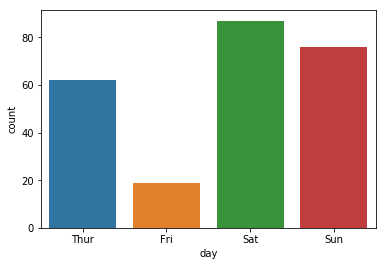

In [90]:
# Your code here
sns.countplot(x='day', data=tips)

**Visualize # of smoker and non-smoker tables**

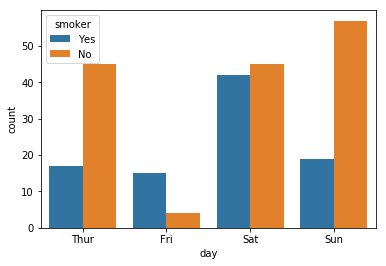

In [91]:
# Your code here
sns.countplot(x='day', data=tips, hue='smoker')


**Visualize # of male/female customers who pay**

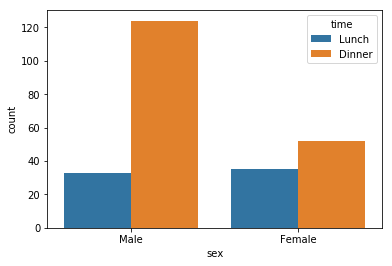

In [171]:
# Your code here
sns.countplot(x='sex', data= tips, hue ='time')

**Analyze the distribution of payments of male and female in different days**

*Hint: countplot with `hue='sex'`*

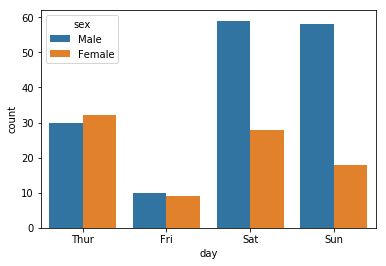

In [94]:
# Your code here
sns.countplot(x = 'day' , data = tips, hue ='sex' )

**Analyze the # of tables in different time (lunch or dinner) and days**

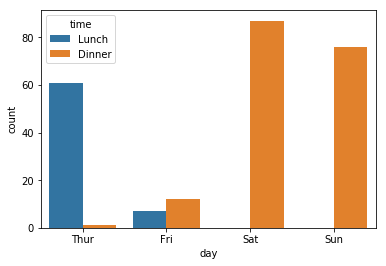

In [172]:
# Your code here
sns.countplot(x = 'day', data = tips, hue ='time' )

**Example: Visualize the distribution of the total bill**


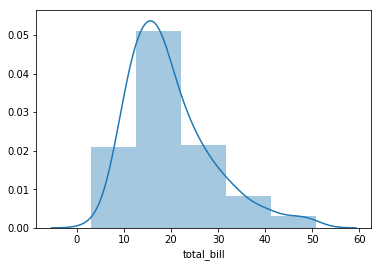

In [174]:
sns.distplot(tips['total_bill'], bins=5) # Chia làm 5 cột do data của mình là liên tục

**Visualize the distribution of the tip**

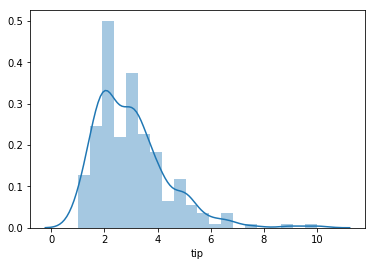

In [176]:
# Your code here
sns.distplot(tips['tip'] , bins = 20)

**Example: Scatter plot of tip and total bill**

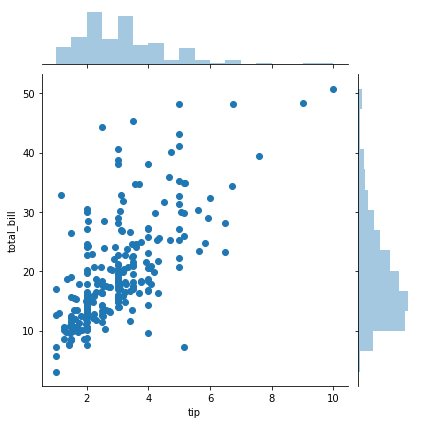

In [104]:
sns.jointplot(x='tip', y='total_bill', data=tips)

**Add one more parameter `kind='hex'` to the previous   `jointplot()` function**

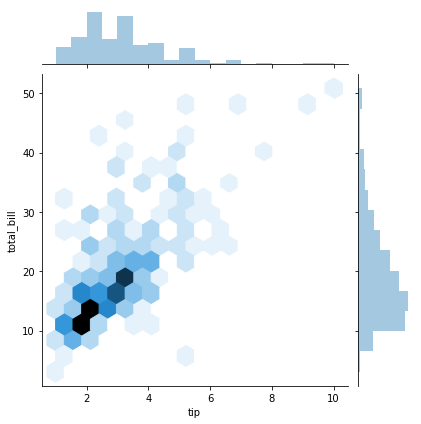

In [107]:
# Your code here
sns.jointplot(x='tip', y ='total_bill' , data=tips,  kind='hex')

**Let's try with `kind='kde'` (KDE - Kernel Density Estimation)**

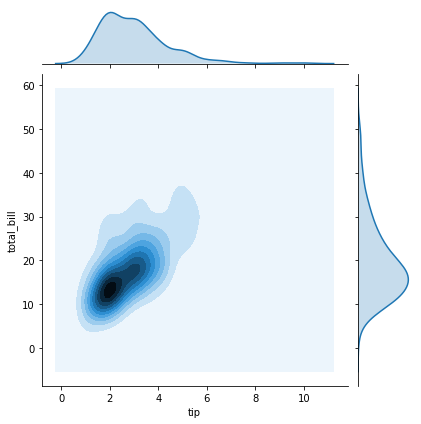

In [108]:
# Your code here
sns.jointplot(x = 'tip' , y='total_bill', data=tips, kind='kde')

**Analyze the relationship between `size` and `tip`**

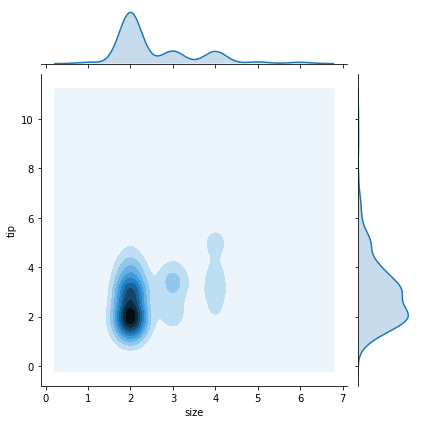

In [110]:
# Your code here
sns.jointplot(x = 'size', y = 'tip' , data = tips, kind='kde' )

**Correlation Matrix**

Show the correlation matrix and comfirm the analytics you have from previous steps.

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


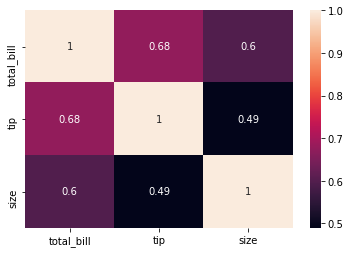

In [177]:
# Your code here
print(tips.corr())
sns.heatmap(data= tips.corr(), annot=True)

**Box plot, Swarm plot and Violin plot**

![](https://i.imgur.com/5Lo17qp.png)

**Implement the seaborn's function `boxplot()` with params: `x='sex'`, `y='total_bill'` and `data=tips`**

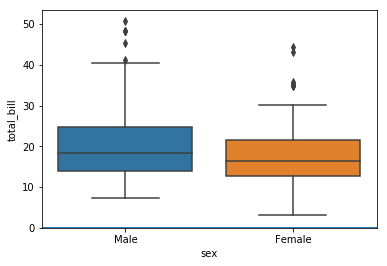

In [118]:
# Your code here


sns.boxplot(x='sex', y='total_bill' , data= tips)

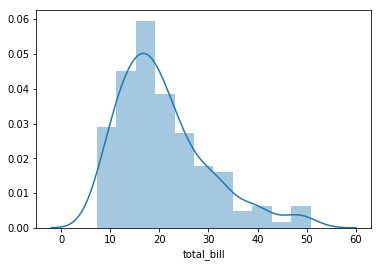

In [119]:
sns.distplot(tips[tips['sex']=='Male']['total_bill'])

**Implement `boxplot()` with params: `x='sex'`, `y='total_bill'` and `data=tips`**

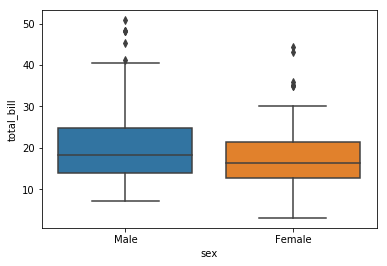

In [120]:
# Your code here
sns.boxplot(x='sex', y='total_bill', data=tips)

**Add `hue='smoker'` to the previous `boxplot()`**

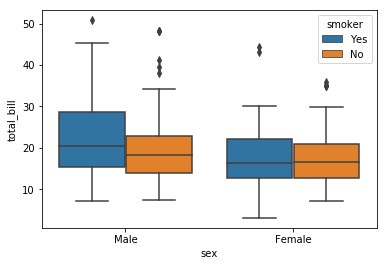

In [123]:
# Your code here
sns.boxplot(x='sex', y='total_bill', data=tips, hue='smoker')

**Implement `swarmplot()` with: `x='day', y='tip', hue='smoker', data=tips`**

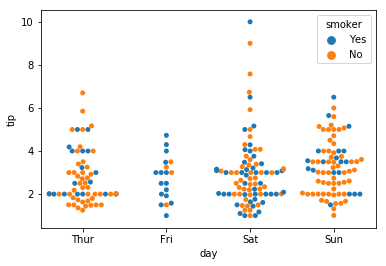

In [124]:
# Your code here
sns.swarmplot(x='day', y='tip', hue='smoker', data=tips)

**Implement previous chart with `violinplot()`**

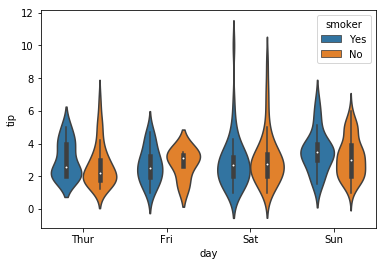

In [125]:
# Your code here
sns.violinplot(x='day', y='tip' , hue='smoker' , data= tips)

### Bonus

**Total revenue per day**

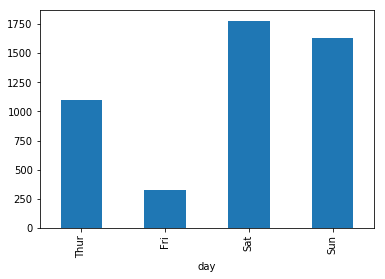

In [126]:
tips.groupby('day').sum()['total_bill'].plot(kind='bar')

**Pie chart of table size in percentage**

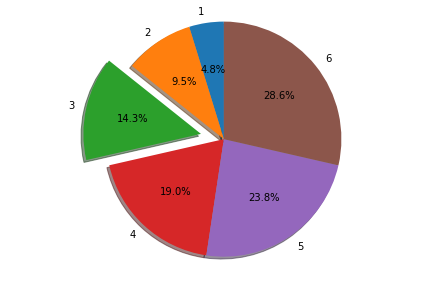

In [137]:
# Pie chart
labels = []
sizes = []
explode = []

labels = tips['size'].value_counts().index.sort_values()
for index, size in enumerate(labels):
    sizes.append(size)
    if size==3:
        explode.append(0.2)
    else:
        explode.append(0)
 
f, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [135]:
tips['size'].unique()
labels = []
sizes = []
explode = []

labels = tips['size'].value_counts().index.sort_values()
print(labels)
for index, size in enumerate(labels):
    sizes.append(size)
    if size==3:
        explode.append(0.2)
    else:
        explode.append(0)

print(sizes)

Int64Index([1, 2, 3, 4, 5, 6], dtype='int64')
[1, 2, 3, 4, 5, 6]


## Great Job!!